# Analiza najbolj dragocenih nogometašev

Na tej datoteki bo potekala analiza o najbolj dragocenih nogometašev, pridobljenih s pomočjo datoteke *Transfermarkt.py*.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [53]:
pd.options.display.max_rows = 20

In [54]:
osnovni_podatki = pd.read_csv("podatki/nogometasi.csv")

In [55]:
osnovni_podatki.head()

,ime,pozicija,starost,drzava_1,drzava_2,klub,cena,stevilna_cena_eur
0,Lamine Yamal,Right Winger,18,Spain,Equatorial Guinea,FC Barcelona,€200.00m,20000000000
1,Jude Bellingham,Attacking Midfield,22,England,Ireland,Real Madrid,€180.00m,18000000000
2,Erling Haaland,Centre-Forward,25,Norway,NaN,Manchester City,€180.00m,18000000000
3,Kylian Mbappé,Centre-Forward,26,France,Cameroon,Real Madrid,€180.00m,18000000000
4,Vinicius Junior,Left Winger,25,Brazil,Spain,Real Madrid,€170.00m,17000000000


In [56]:
osnovni_podatki[['ime', 'klub']]

,ime,klub
0,Lamine Yamal,FC Barcelona
1,Jude Bellingham,Real Madrid
2,Erling Haaland,Manchester City
3,Kylian Mbappé,Real Madrid
4,Vinicius Junior,Real Madrid
...,...,...
494,Facundo Buonanotte,Brighton &amp; Hove Albion
495,Wesley,AS Roma
496,Chris Rigg,Sunderland AFC
497,Vitor Roque,Sociedade Esportiva Palmeiras


In [57]:
osnovni_podatki.starost <= 20

0       True
1      False
2      False
3      False
4      False
       ...  
494     True
495    False
496     True
497     True
498    False
Name: starost, Length: 499, dtype: bool

In [58]:
osnovni_podatki[osnovni_podatki.starost <= 20]

,ime,pozicija,starost,drzava_1,drzava_2,klub,cena,stevilna_cena_eur
0,Lamine Yamal,Right Winger,18,Spain,Equatorial Guinea,FC Barcelona,€200.00m,20000000000
19,Désiré Doué,Right Winger,20,France,Cote d'Ivoire,Paris Saint-Germain,€90.00m,9000000000
26,Pau Cubarsí,Centre-Back,18,Spain,NaN,FC Barcelona,€80.00m,8000000000
27,João Neves,Central Midfield,20,Portugal,NaN,Paris Saint-Germain,€80.00m,8000000000
60,Estêvão,Right Winger,18,Brazil,NaN,Chelsea FC,€60.00m,6000000000
...,...,...,...,...,...,...,...,...
447,Jobe Bellingham,Central Midfield,19,England,Ireland,Borussia Dortmund,€22.00m,2200000000
493,Konstantinos Karetsas,Attacking Midfield,17,Greece,Belgium,KRC Genk,€20.00m,2000000000
494,Facundo Buonanotte,Attacking Midfield,20,Argentina,Italy,Brighton &amp; Hove Albion,€20.00m,2000000000
496,Chris Rigg,Attacking Midfield,18,England,NaN,Sunderland AFC,€20.00m,2000000000


In [59]:
osnovni_podatki[osnovni_podatki.klub == "Juventus FC"]

,ime,pozicija,starost,drzava_1,drzava_2,klub,cena,stevilna_cena_eur
87,Kenan Yıldız,Left Winger,20,Türkiye,Germany,Juventus FC,€50.00m,5000000000
98,Bremer,Centre-Back,28,Brazil,NaN,Juventus FC,€50.00m,5000000000
132,Jonathan David,Centre-Forward,25,Canada,United States,Juventus FC,€45.00m,4500000000
169,Nico González,Right Winger,27,Argentina,Italy,Juventus FC,€24.00m,2400000000
170,Khéphren Thuram,Central Midfield,24,France,Guadeloupe,Juventus FC,€40.00m,4000000000
213,Andrea Cambiaso,Left-Back,25,Italy,NaN,Juventus FC,€35.00m,3500000000
222,Teun Koopmeiners,Attacking Midfield,27,Netherlands,NaN,Juventus FC,€35.00m,3500000000
223,Dušan Vlahović,Centre-Forward,25,Serbia,NaN,Juventus FC,€35.00m,3500000000
287,Douglas Luiz,Central Midfield,27,Brazil,NaN,Juventus FC,€30.00m,3000000000
305,Manuel Locatelli,Defensive Midfield,27,Italy,NaN,Juventus FC,€30.00m,3000000000


In [60]:
starost_igralcev = osnovni_podatki[['ime', 'starost']]
starost_igralcev

,ime,starost
0,Lamine Yamal,18
1,Jude Bellingham,22
2,Erling Haaland,25
3,Kylian Mbappé,26
4,Vinicius Junior,25
...,...,...
494,Facundo Buonanotte,20
495,Wesley,21
496,Chris Rigg,18
497,Vitor Roque,20


In [61]:
osnovni_podatki.sort_values('starost')

,ime,pozicija,starost,drzava_1,drzava_2,klub,cena,stevilna_cena_eur
311,Ayyoub Bouaddi,Central Midfield,17,France,Morocco,LOSC Lille,€28.00m,2800000000
257,Franco Mastantuono,Right Winger,17,Argentina,Italy,CA River Plate,€30.00m,3000000000
493,Konstantinos Karetsas,Attacking Midfield,17,Greece,Belgium,KRC Genk,€20.00m,2000000000
0,Lamine Yamal,Right Winger,18,Spain,Equatorial Guinea,FC Barcelona,€200.00m,20000000000
75,Ethan Nwaneri,Right Winger,18,England,Nigeria,Arsenal FC,€55.00m,5500000000
...,...,...,...,...,...,...,...,...
234,Marquinhos,Centre-Back,31,Brazil,Portugal,Paris Saint-Germain,€35.00m,3500000000
45,Harry Kane,Centre-Forward,32,England,NaN,Bayern Munich,€75.00m,7500000000
491,Romelu Lukaku,Centre-Forward,32,Belgium,DR Congo,SSC Napoli,€22.00m,2200000000
117,Mohamed Salah,Right Winger,33,Egypt,NaN,Liverpool FC,€50.00m,5000000000


In [62]:
osnovni_podatki.sort_values('starost', ascending=False)

,ime,pozicija,starost,drzava_1,drzava_2,klub,cena,stevilna_cena_eur
441,Virgil van Dijk,Centre-Back,34,Netherlands,Suriname,Liverpool FC,€23.00m,2300000000
117,Mohamed Salah,Right Winger,33,Egypt,NaN,Liverpool FC,€50.00m,5000000000
45,Harry Kane,Centre-Forward,32,England,NaN,Bayern Munich,€75.00m,7500000000
491,Romelu Lukaku,Centre-Forward,32,Belgium,DR Congo,SSC Napoli,€22.00m,2200000000
421,John Stones,Centre-Back,31,England,NaN,Manchester City,€25.00m,2500000000
...,...,...,...,...,...,...,...,...
118,Geovany Quenda,Right Winger,18,Portugal,Guinea-Bissau,Sporting CP,€45.00m,4500000000
496,Chris Rigg,Attacking Midfield,18,England,NaN,Sunderland AFC,€20.00m,2000000000
311,Ayyoub Bouaddi,Central Midfield,17,France,Morocco,LOSC Lille,€28.00m,2800000000
493,Konstantinos Karetsas,Attacking Midfield,17,Greece,Belgium,KRC Genk,€20.00m,2000000000


In [63]:
igralci_po_klubu = osnovni_podatki.groupby('klub')

In [64]:
igralci_po_klubu

In [65]:
igralci_po_klubu.ime.sample()

428           Paul Nebel
274     Santiago Gimenez
109           Moise Kean
314       Dango Ouattara
445        Lamine Camara
             ...        
236       Mohamed Amoura
269          Yéremy Pino
377    Maximilian Kilman
320                 Toti
404               Gerson
Name: ime, Length: 84, dtype: object

In [66]:
igralci_po_ceni = osnovni_podatki.groupby('cena')
igralci_po_ceni.count()

,ime,pozicija,starost,drzava_1,drzava_2,klub,stevilna_cena_eur
cena,,,,,,,
€100.00m,4,4,4,4,3,4,4
€110.00m,1,1,1,1,0,1,1
€120.00m,3,3,3,3,3,3,3
€130.00m,1,1,1,1,1,1,1
€140.00m,3,3,3,3,1,3,3
...,...,...,...,...,...,...,...
€75.00m,12,12,12,12,6,12,12
€80.00m,8,8,8,8,3,8,8
€85.00m,1,1,1,1,0,1,1


In [67]:
igralci_po_ceni.size()

cena
€100.00m     4
€110.00m     1
€120.00m     3
€130.00m     1
€140.00m     3
            ..
€75.00m     12
€80.00m      8
€85.00m      1
€90.00m      6
€95.00m      1
Length: 35, dtype: int64

<Axes: xlabel='stevilna_cena_eur'>

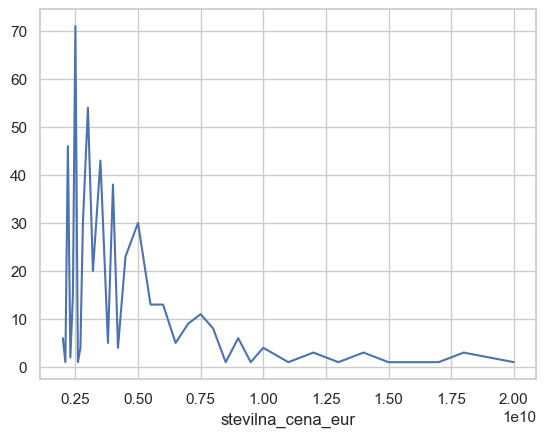

In [68]:
osnovni_podatki[osnovni_podatki.starost < 30].groupby('stevilna_cena_eur').size().plot()

<Axes: xlabel='stevilna_cena_eur', ylabel='starost'>

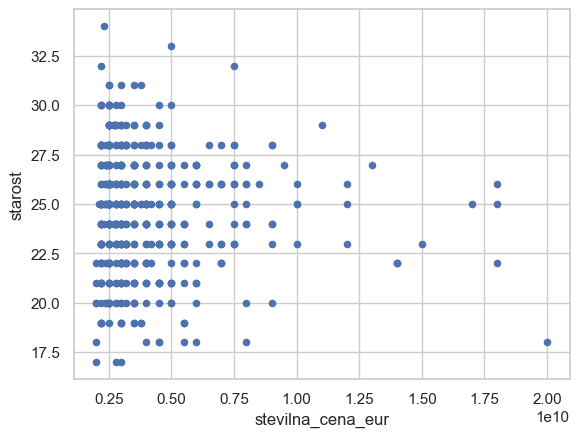

In [69]:
osnovni_podatki.plot.scatter('stevilna_cena_eur', 'starost')

<Axes: xlabel='ime'>

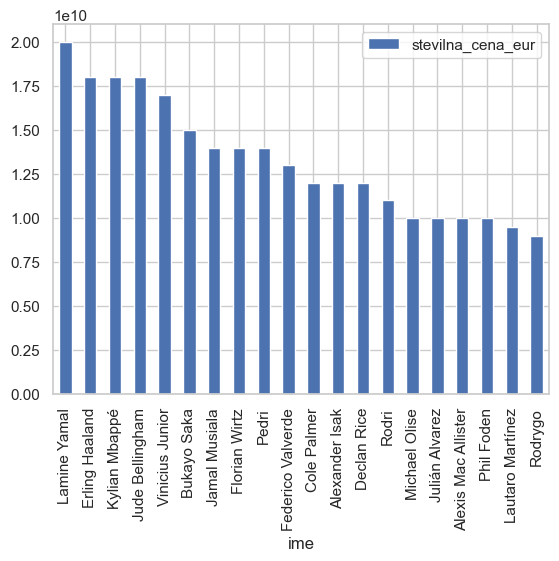

In [70]:
osnovni_podatki.sort_values('stevilna_cena_eur', ascending=False).head(20).plot.bar(x='ime', y='stevilna_cena_eur')

## 10 najvrednejši igralci

In [71]:
top10 = osnovni_podatki.sort_values('stevilna_cena_eur', ascending=False).head(10)
print("\n🏆 10 najvrednejših igralcev:")
top10[['ime', 'stevilna_cena_eur', 'pozicija', 'drzava_1']]


🏆 10 najvrednejših igralcev:


,ime,stevilna_cena_eur,pozicija,drzava_1
0,Lamine Yamal,20000000000,Right Winger,Spain
2,Erling Haaland,18000000000,Centre-Forward,Norway
3,Kylian Mbappé,18000000000,Centre-Forward,France
1,Jude Bellingham,18000000000,Attacking Midfield,England
4,Vinicius Junior,17000000000,Left Winger,Brazil
5,Bukayo Saka,15000000000,Right Winger,England
8,Jamal Musiala,14000000000,Attacking Midfield,Germany
7,Florian Wirtz,14000000000,Attacking Midfield,Germany
6,Pedri,14000000000,Central Midfield,Spain
9,Federico Valverde,13000000000,Central Midfield,Uruguay


## Povprečna vrednost po poziciji

In [72]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100

povprecje_pozicija = (
    osnovni_podatki
    .groupby('pozicija')['stevilna_cena_eur']
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n📈 Povprečna vrednost po pozicijah:")
povprecje_pozicija.astype(str) + "M"

povprecje_pozicija_ = povprecje_pozicija.reset_index()
povprecje_pozicija_.columns = ['Pozicija', 'Povprečna vrednost']
povprecje_pozicija_['Povprečna vrednost'] = povprecje_pozicija_['Povprečna vrednost'].map("{:,.2f}M".format)

povprecje_pozicija_


📈 Povprečna vrednost po pozicijah:


,Pozicija,Povprečna vrednost
0,Attacking Midfield,46.93M
1,Right Winger,45.27M
2,Second Striker,43.75M
3,Central Midfield,43.24M
4,Centre-Forward,42.75M
5,Left Winger,42.39M
6,Defensive Midfield,39.57M
7,Right-Back,37.83M
8,Left-Back,36.03M
9,Centre-Back,35.39M


## Povprečna vrednost po starostnih skupinah

In [73]:
if osnovni_podatki['stevilna_cena_eur'].median() > 1e8:
    osnovni_podatki['stevilna_cena_eur'] = osnovni_podatki['stevilna_cena_eur'] / 100


bins = [0, 20, 25, 30, 100]
labels = ["≤20", "21–25", "26–30", "31+"]
osnovni_podatki['starostna_skupina'] = pd.cut(osnovni_podatki['starost'], bins=bins, labels=labels, right=True)

povprecje_starost = (
    osnovni_podatki
    .groupby("starostna_skupina", observed=False)["stevilna_cena_eur"]
    .mean()
    .sort_values(ascending=False)
    .round(2) / 1_000_000
)

print("\n🍰 Povprečna vrednost po starostni skupini:")
povprecje_starost.astype(str) + "M"

povprecje_starost_ = povprecje_starost.reset_index()
povprecje_starost_.columns = ["Starostna skupina", "Povprečna vrednost"]
povprecje_starost_["Povprečna vrednost"] = povprecje_starost_["Povprečna vrednost"].map("{:,.2f}M".format)

povprecje_starost_


🍰 Povprečna vrednost po starostni skupini:


,Starostna skupina,Povprečna vrednost
0,21–25,41.28M
1,26–30,40.07M
2,≤20,40.00M
3,31+,35.89M


## Graf starosti igralcev

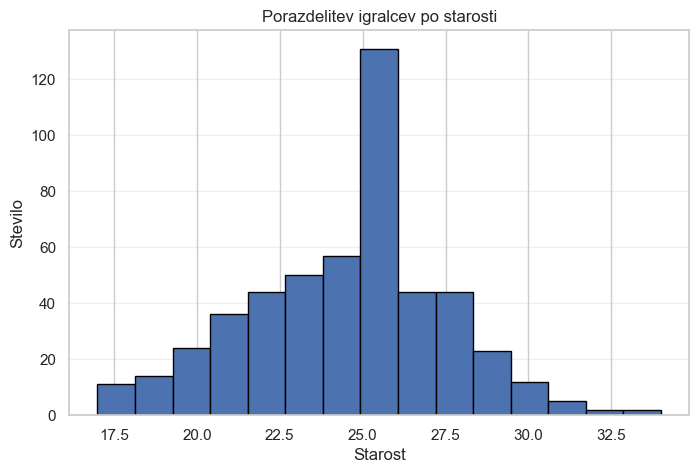

In [74]:
plt.figure(figsize=(8, 5))
plt.hist(osnovni_podatki["starost"], bins=15, edgecolor="black")
plt.title("Porazdelitev igralcev po starosti")
plt.xlabel("Starost")
plt.ylabel("Stevilo")
plt.grid(axis="y", alpha=0.3)
plt.show()

## Razsevni diagram: *Starost vs. Vrednost*

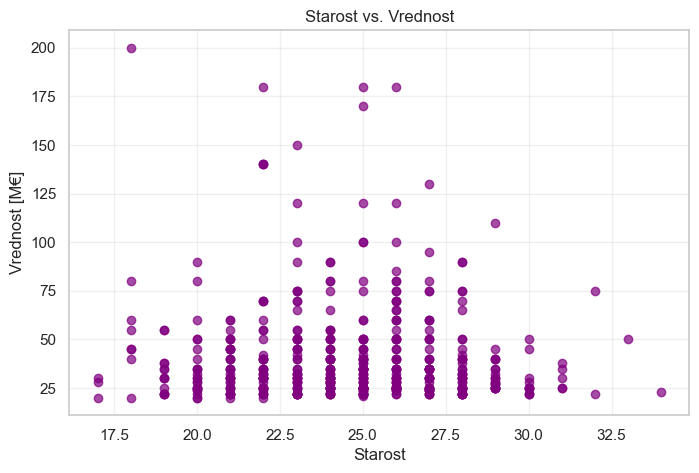

In [75]:
plt.figure(figsize=(8, 5))
plt.scatter(osnovni_podatki["starost"], osnovni_podatki["stevilna_cena_eur"] / 1_000_000, alpha=0.7, c="purple")
plt.title("Starost vs. Vrednost")
plt.xlabel("Starost")
plt.ylabel("Vrednost [M€]")
plt.grid(alpha=0.3)
plt.show()

## Stolpčni diagram: Skupna vrednost ekipe na klub *(top 10)*

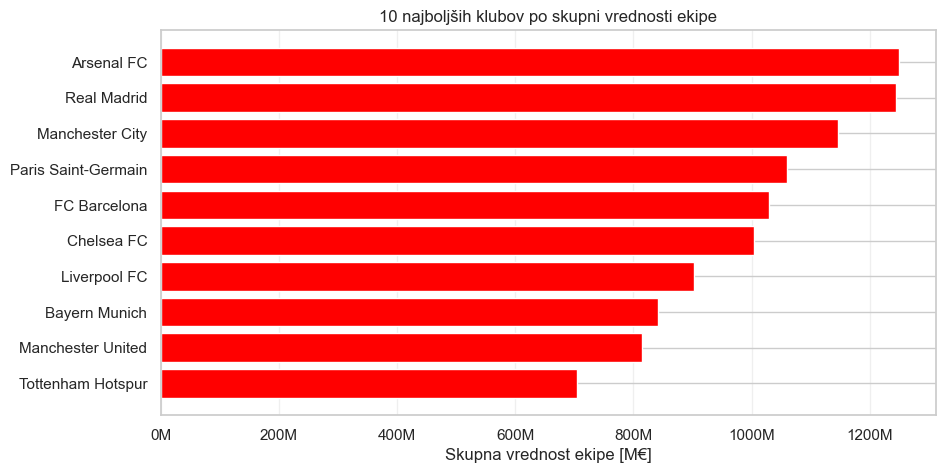

In [76]:
club_value = (
    osnovni_podatki.groupby("klub")["stevilna_cena_eur"]
    .sum()
    .sort_values(ascending=False)
    .head(10) / 1_000_000
).round(2)

plt.figure(figsize=(10, 5))
plt.barh(club_value.index, club_value.values, color="red")
plt.title("10 najboljših klubov po skupni vrednosti ekipe")
plt.xlabel("Skupna vrednost ekipe [M€]")
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0fM'))
plt.gca().invert_yaxis()  # najvrednejši na vrhu
plt.grid(axis="x", alpha=0.3)
plt.show()